![crack](https://www.deltawines.eu/assets/files/shutterstock-532006042-72-1.1920x0.jpg)

# Wine Grading

Let's practice Decision Trees & Random Forest on a super cool dataset. We'll be trying to predict the quality of a given wine! 

Your goal will be to:

1. Preprocess the data
2. Create a classification algorithm

Happy Coding!

## Step 1 - Import Data 🤹‍♀️

- Import usual librairies

In [32]:
import pandas as pd
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt 

from sklearn.tree import plot_tree

print("pandas  version : ", pd.__version__)
print("sns     version : ", sns.__version__)

pandas  version :  2.1.4
sns     version :  0.13.2


- Import `Wine_grading.csv` and visualize dataset

In [33]:
df = pd.read_csv("../99-assets/ML/Wine_grading.csv")
df.head()

,Unnamed: 0,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,Grade
0,0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


- Remove `Unnamed:0` column from the dataset

In [34]:
#df = df.drop(columns=["Unnamed: 0"], axis=1)
df = df.drop(columns=["Unnamed: 0"])
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,Grade
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


## Step 2 - EDA 📊

- Visualize `alcohol` and `Grade`

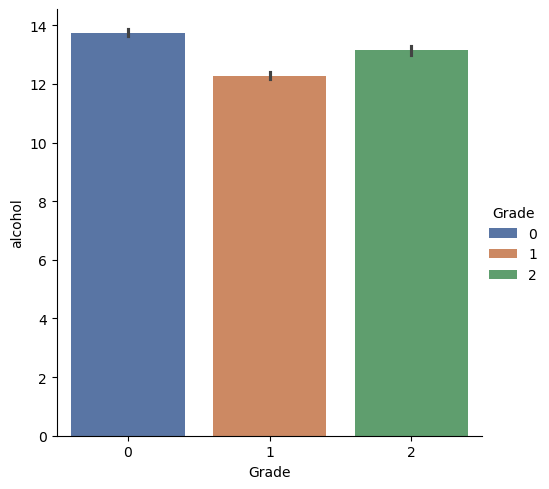

In [35]:
_ = sns.catplot(data = df, x="Grade", y="alcohol", kind="bar", hue="Grade", palette="deep")

- Visualize `magnesium` and `Grade`

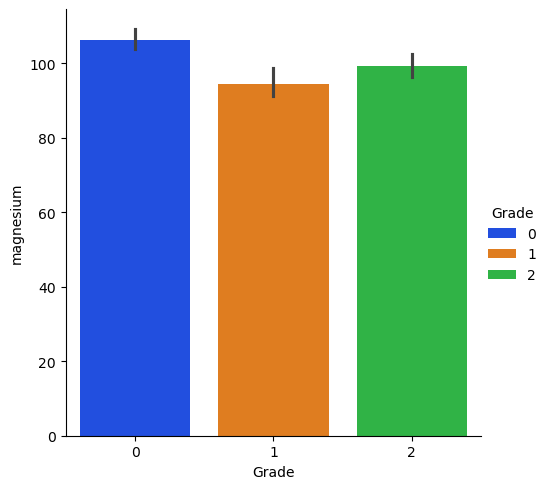

In [36]:
sns.catplot(data = df, x="Grade", y="magnesium", kind="bar", hue="Grade", palette="bright")

- Visualize `color_intensity` and `Grade`

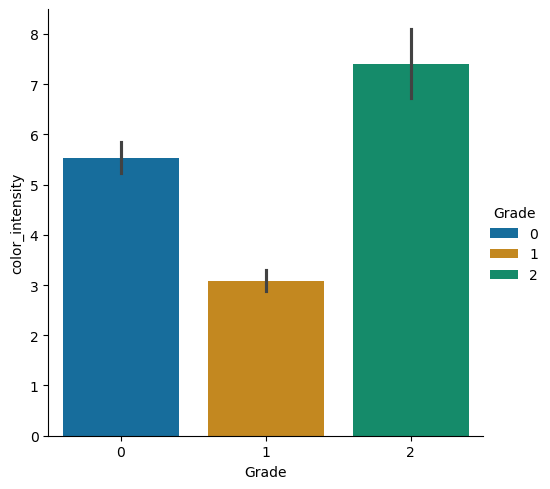

In [37]:
sns.catplot(data = df, x="Grade", y="color_intensity", kind="bar", hue="Grade", palette="colorblind")

* Show your dataset main statistics

In [38]:
df.describe(include="all")

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,Grade
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


- Let's take a look to missing values

In [39]:
df.isna().sum() 

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
Grade                           0
dtype: int64

In [40]:
df.isnull().any()

alcohol                         False
malic_acid                      False
ash                             False
alcalinity_of_ash               False
magnesium                       False
total_phenols                   False
flavanoids                      False
nonflavanoid_phenols            False
proanthocyanins                 False
color_intensity                 False
hue                             False
od280/od315_of_diluted_wines    False
proline                         False
Grade                           False
dtype: bool

## Step 3 - Preprocessing 🍳

- Split your dataset by $X$ and $y$

In [41]:
y = df.loc[:,"Grade"]                                      

# features_list = df.columns[:-1]
# X = df.loc[:,features_list]
X = df.drop(columns=["Grade"])                             


- Split your data in train and test sets

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=0, 
                                                    stratify = y) 

- Make all the required preprocessings on the train set

In [43]:
print(X_train.head())                                               # print first 5 rows (not using iloc since now X_train became a numpy array)

     alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
84     11.84        0.89  2.58               18.0       94.0           2.20   
11     14.12        1.48  2.32               16.8       95.0           2.20   
168    13.58        2.58  2.69               24.5      105.0           1.55   
138    13.49        3.59  2.19               19.5       88.0           1.62   
86     12.16        1.61  2.31               22.8       90.0           1.78   

     flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
84         2.21                  0.22             2.35             3.05  0.79   
11         2.43                  0.26             1.57             5.00  1.17   
168        0.84                  0.39             1.54             8.66  0.74   
138        0.48                  0.58             0.88             5.70  0.81   
86         1.69                  0.43             1.56             2.45  1.33   

     od280/od315_of_diluted_wines  pro

In [44]:

numeric_features = list(range(13)) 
numeric_transformer = StandardScaler()

feature_encoder = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features)
        ]
    )
X_train = feature_encoder.fit_transform(X_train)
print(X_train[0:5,0:3])                                               # print first 5 rows (not using iloc since now X_train became a numpy array)

[[-1.45083563 -1.27985582  0.74306024]
 [ 1.34746381 -0.75756493 -0.2118226 ]
 [ 0.68470868  0.21619776  1.14704913]
 [ 0.57424949  1.11028895 -0.68926402]
 [-1.05809185 -0.64248388 -0.24854886]]


## Build your model 🏋️‍♂️

<!-- - Create your Logistic Regression model -->
- Create your Decision Tree Classifier

In [45]:
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)                  # This steps is the actual training
y_train_pred = classifier.predict(X_train)

- Evaluate it (don't forget to preprocess X_test)

In [46]:
X_test = feature_encoder.transform(X_test)
y_test_pred = classifier.predict(X_test)

- Look at your model scores on train and test

In [47]:
print("Score sur Train set ",classifier.score(X_train, y_train))
print("Score sur Test  set ",classifier.score(X_test, y_test))

Score sur Train set  1.0
Score sur Test  set  0.9444444444444444


- What can you say about it ?

In [48]:
# Overfit

- Create the confusion matrix with `plot_confusion_matrix`

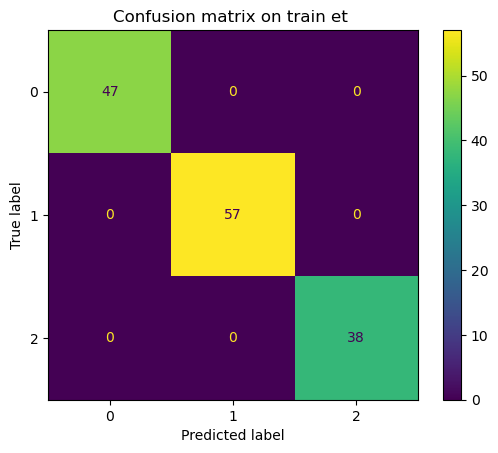

In [49]:
# Plot confusion matrix on train set
cm = confusion_matrix(y_train, y_train_pred, labels=classifier.classes_)
cm_display = ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred)
cm_display.ax_.set_title("Confusion matrix on train et ") 
plt.show() 

In [50]:
# https://vitalflux.com/accuracy-precision-recall-f1-score-python-example/
# Precision : Out of all the positive predicted, what percentage is truly positive. Spam
# Recall    : Out of the total positive, what percentage are predicted positive.    Medicine, Credit card
# F1        : Harmonic average Recall Precision 

# ! average='micro' ==> https://stackoverflow.com/questions/52269187/facing-valueerror-target-is-multiclass-but-average-binary
# print(f"Precision TP/(TP+FP) - Left col                  : {precision_score(y_train, y_train_pred, average='micro'):.3f}" )
# print(f"Recall TP/(TP+FN)  - Bottom line                 : {recall_score(y_train, y_train_pred, average='micro'):.3f}" )
# print(f"F1 2/(1/Prec + 1/Rec)                            : {f1_score(y_train, y_train_pred, average='micro'):.3f}" )
# print(f"Accuracy (TP+TN)/(TP+FN+TN+FP) - Diag over total : {accuracy_score(y_train, y_train_pred):.3f}" )
print(f"Accuracy on train set                            : {classifier.score(X_train, y_train):.3f}")

Accuracy on train set                            : 1.000


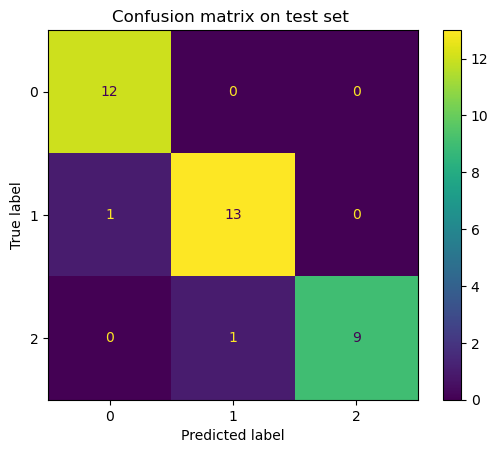

In [51]:
# Plot confusion matrix on test set
cm = confusion_matrix(y_test, y_test_pred, labels=classifier.classes_)
cm_display = ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred)
cm_display.ax_.set_title("Confusion matrix on test set ") 
plt.show() 

In [52]:
# https://vitalflux.com/accuracy-precision-recall-f1-score-python-example/
# Precision : Out of all the positive predicted, what percentage is truly positive. Credit card
# Recall    : Out of the total positive, what percentage are predicted positive.    Spam
# F1        : Harmonic average Recall Precision 
# print(f"Precision TP/(TP+FP) - Left col                  : {precision_score(y_test, y_test_pred, average='micro'):.3f}" )
# print(f"Recall TP/(TP+FN)  - Bottom line                 : {recall_score(y_test, y_test_pred, average='micro'):.3f}" )
# print(f"F1 2/(1/Prec + 1/Rec)                            : {f1_score(y_test, y_test_pred, average='micro'):.3f}" )
# print(f"Accuracy (TP+TN)/(TP+FN+TN+FP) - Diag over total : {accuracy_score(y_test, y_test_pred):.3f}" )
print(f"Accuracy on test set                            : {classifier.score(X_test, y_test):.3f}")

Accuracy on test set                            : 0.944


- Create a dataframe with features importance

* Our model is overfitting. Let's try to play with parameters. Using [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html?highlight=decision%20tree#sklearn.tree.DecisionTreeClassifier) try to: 
    * Increase `min_samples_split`
    * Play around with other parameters if you want to better optimize your model! 🔧

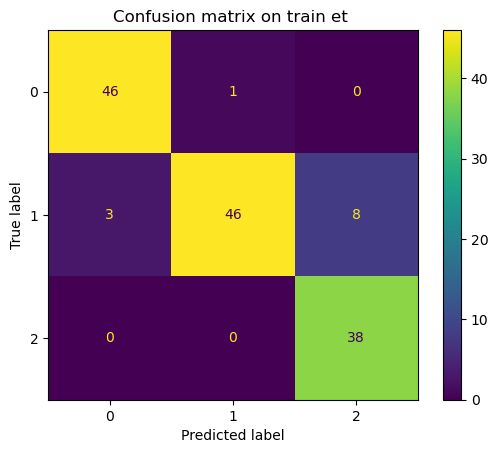

Accuracy on train set                            : 0.915


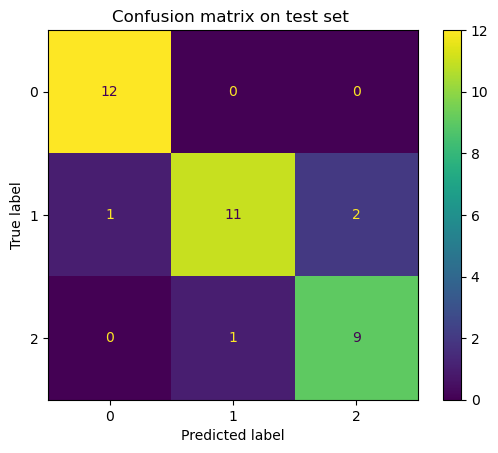

Accuracy on test set                            : 0.889


In [53]:
classifier = DecisionTreeClassifier(min_samples_split=80, class_weight="balanced" )
classifier.fit(X_train, y_train) 
y_train_pred = classifier.predict(X_train)
y_test_pred = classifier.predict(X_test)

# Plot confusion matrix on train set
cm = confusion_matrix(y_train, y_train_pred, labels=classifier.classes_)
cm_display = ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred)
cm_display.ax_.set_title("Confusion matrix on train et ") 
plt.show() 
print(f"Accuracy on train set                            : {classifier.score(X_train, y_train):.3f}")

# Plot confusion matrix on test set
cm = confusion_matrix(y_test, y_test_pred, labels=classifier.classes_)
cm_display = ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred)
cm_display.ax_.set_title("Confusion matrix on test set ") 
plt.show() 
print(f"Accuracy on test set                            : {classifier.score(X_test, y_test):.3f}")

In [54]:
print("Score sur Train set ",classifier.score(X_train, y_train))
print("Score sur Test  set ",classifier.score(X_test, y_test))

Score sur Train set  0.9154929577464789
Score sur Test  set  0.8888888888888888


## Bonus 1 - Feature Importance 🏄‍♂️

* Try to visualize feature importance of your decision tree

In [55]:
# On accède aux transformers du ColumnTransformer feature_encoder
print("All transformers are           : ", *feature_encoder.transformers_)

# Ici y a pas de OneHotEncoder donc on peut commenter le reste
# On accède au OneHotEncoder
# print("One Hot Encoder transformer is : ", feature_encoder.transformers_[0][1])

# On accède aux catégories du OneHotEncoder
# Une liste de 1 ou plusieurs tableaux
# Ici il y a 1 jeu de valeurs dans 1 tableau
# print("One Hot Encoder transformer is : ", *feature_encoder.transformers_[0][1].categories_)

All transformers are           :  ('num', StandardScaler(), [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])


In [56]:
# On veut construire un dataframe avec 
# une colonne pour les noms des features 
# une colonne avec les valeurs des coefs associés

# Ici y a pas de colonne avec des catégories dont on peut commenter
# On utilise concatenate car il peut y avoir un ou plusieurs tableaux dans la liste feature_encoder.transformers_[0][1].categories_
# categorical_column_names = np.concatenate(feature_encoder.transformers_[0][1].categories_)

# numeric_features = une liste avec les indices des colonnes numériques
# .columns retourne le nom des colonnes 
numerical_column_names   = X.iloc[:, numeric_features].columns                   
# all_column_names = np.append(categorical_column_names, numerical_column_names)
all_column_names = numerical_column_names

feature_importance = pd.DataFrame({
    "feature_names" : all_column_names,
    "coefficients"  : classifier.feature_importances_
})
print(feature_importance, "\n")
# Ici y a pas de constante
# print(f"Constant is        {regressor.intercept_:.6f}\n")

                   feature_names  coefficients
0                        alcohol      0.000000
1                     malic_acid      0.000000
2                            ash      0.000000
3              alcalinity_of_ash      0.000000
4                      magnesium      0.000000
5                  total_phenols      0.000000
6                     flavanoids      0.514307
7           nonflavanoid_phenols      0.000000
8                proanthocyanins      0.000000
9                color_intensity      0.000000
10                           hue      0.000000
11  od280/od315_of_diluted_wines      0.000000
12                       proline      0.485693 



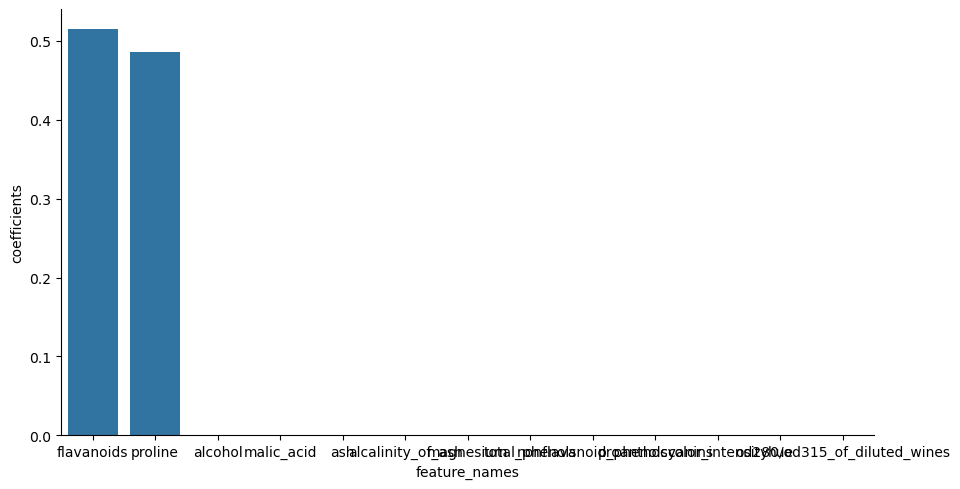

In [57]:
# Set coefficient to absolute values to rank features
feature_importance["coefficients"] = feature_importance["coefficients"].abs()
sns.catplot(feature_importance.sort_values(by="coefficients", ascending=False), 
            x="feature_names", 
            y="coefficients", 
            kind="bar",
            aspect=16/9);

On peut faire un peu plus court ici

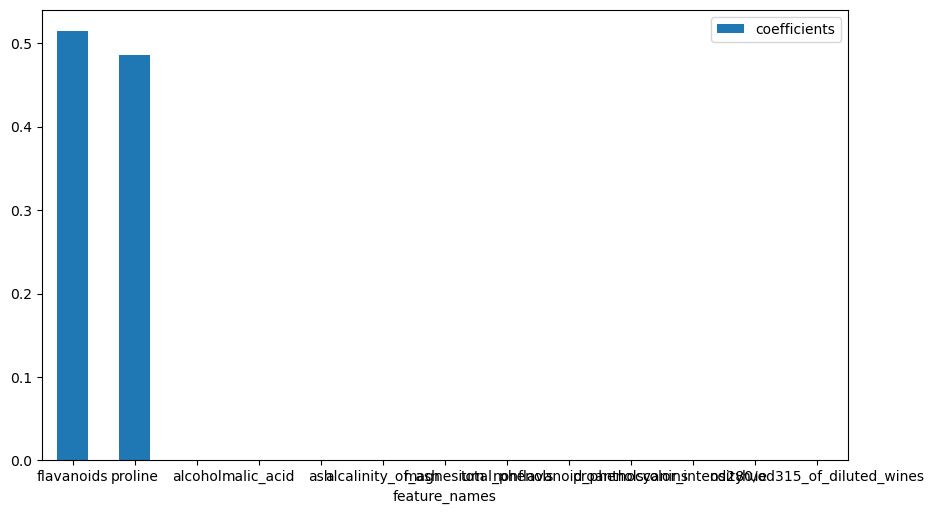

In [61]:
feature_importance = pd.DataFrame({
    "feature_names": X.columns,
    "coefficients": classifier.feature_importances_
})
# print(feature_importance.sort_values(by="coefficients", ascending=False))
feature_importance.sort_values(by="coefficients", ascending=False).plot(kind="bar", x="feature_names", figsize=(16*.65, 9*.65))
_ = plt.xticks(rotation=0)

## Bonus 2 - Try a Random Forest 🏄‍♂️

* Do you think a Random Forest can do better? 

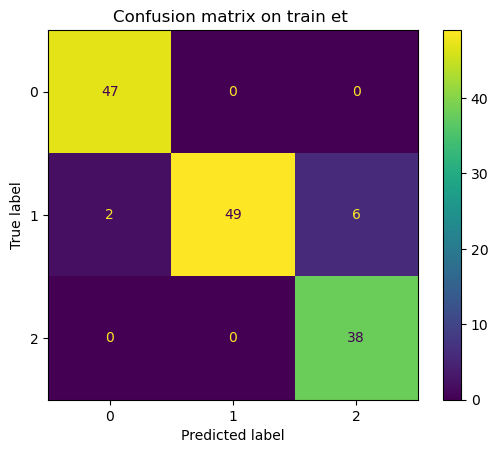

Accuracy on train set                            : 0.944


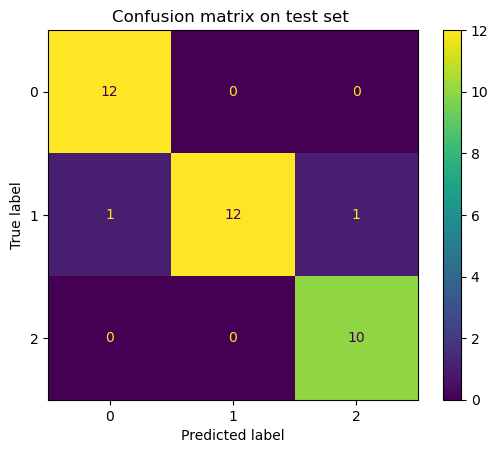

Accuracy on test set                            : 0.944


In [59]:
# classifier = RandomForestClassifier(n_estimators = 30)
classifier = RandomForestClassifier(min_samples_split=80, class_weight="balanced" )

classifier.fit(X_train, y_train) 
y_train_pred = classifier.predict(X_train)
y_test_pred = classifier.predict(X_test)

# Plot confusion matrix on train set
cm = confusion_matrix(y_train, y_train_pred, labels=classifier.classes_)
cm_display = ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred)
cm_display.ax_.set_title("Confusion matrix on train et ") 
plt.show() 
print(f"Accuracy on train set                            : {classifier.score(X_train, y_train):.3f}")

# Plot confusion matrix on test set
cm = confusion_matrix(y_test, y_test_pred, labels=classifier.classes_)
cm_display = ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred)
cm_display.ax_.set_title("Confusion matrix on test set ") 
plt.show() 
print(f"Accuracy on test set                            : {classifier.score(X_test, y_test):.3f}")

## Bonus 3 [For the coding warriors] - Visualize your decision tree 🏄‍♂️

* Did you know that you can visualize an actual decision tree? 
    * Check out this [documentation](https://scikit-learn.org/stable/auto_examples/tree/plot_iris_dtc.html#sphx-glr-auto-examples-tree-plot-iris-dtc-py) and try to do it with your Decision 
    * Careful, it doesn't work for Random Forests 🙏

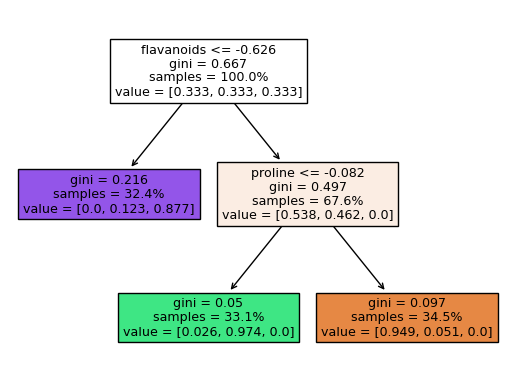

In [60]:
classifier = DecisionTreeClassifier(min_samples_split=80, class_weight="balanced" )
classifier.fit(X_train, y_train) 

fig, ax = plt.subplots() 
plot_tree(classifier, filled = True, feature_names = list(X.columns), proportion = True, ax = ax)
plt.show()